In [2]:
import numpy as np
import glob
from scipy.signal import savgol_filter
from BaselineRemoval import BaselineRemoval

csvfiles = []
wave = 1042  #光谱长度
num = np.arange(1, wave+1)
scores = np.empty((wave, 0))
start = 104  #截取开始的序号
end = 1042  #截取结束的序号
skiprow = 0 #跳过开头行数

for file in glob.glob("*.csv"):
    csvfiles.append(file)
csv_list = glob.glob("*.csv")

def STD(a, windosize, n):

    output = []
    for i in range(len(a)):
        if i < windosize:
            output = np.append(output, a[i])
        elif i > len(a)-windosize-1:
            output = np.append(output, a[i])
        else:
            pl = a[i-windosize:i+windosize+1] 
            median = np.median(pl, axis=0)
            mean = np.mean(pl, axis=0)
            std = np.std(pl)
            max_range = median + n*std 
            min_range = median - n*std           
            if a[i] > max_range:
                max_range = median + n*std *0.01
                output = np.append(output, max_range)            
            elif a[i] < min_range:
                min_range = median - n*std*0.01
                output = np.append(output, min_range)          
            else:
                output = np.append(output, a[i])

    return(output)

In [66]:
for i in range(len(csvfiles)):
    scores = np.c_[num, np.loadtxt(csvfiles[i], skiprows=skiprow, dtype=float, delimiter=',', usecols=(0, 1))[: wave, :]]
    x = scores[:, 1].reshape(-1).tolist()
    y = scores[:, 2].reshape(-1).tolist()

    y1 = STD(y, 2, 0.8) 
    Y = savgol_filter(y1, 1,  0, 0) #四个参数分别是 输入函数，平滑窗口的大小(点数)，平滑次数，求导阶数


    baseObj = BaselineRemoval(Y[start: end])
    Y_Modpoly_output = baseObj.ZhangFit(4)


    Score = np.c_[num[start: end], x[start: end], Y_Modpoly_output]
    newfilename = 'n' + csvfiles[i]
    #np.savetxt(newfilename, Score, delimiter=",", comments="", fmt='%s')

In [67]:
baseline = Y[start: end] - Y_Modpoly_output


In [68]:

base1bj = BaselineRemoval(baseline)
Y_Modpoly_output2 = base1bj.ZhangFit(7)
baseline2 = baseline - Y_Modpoly_output2

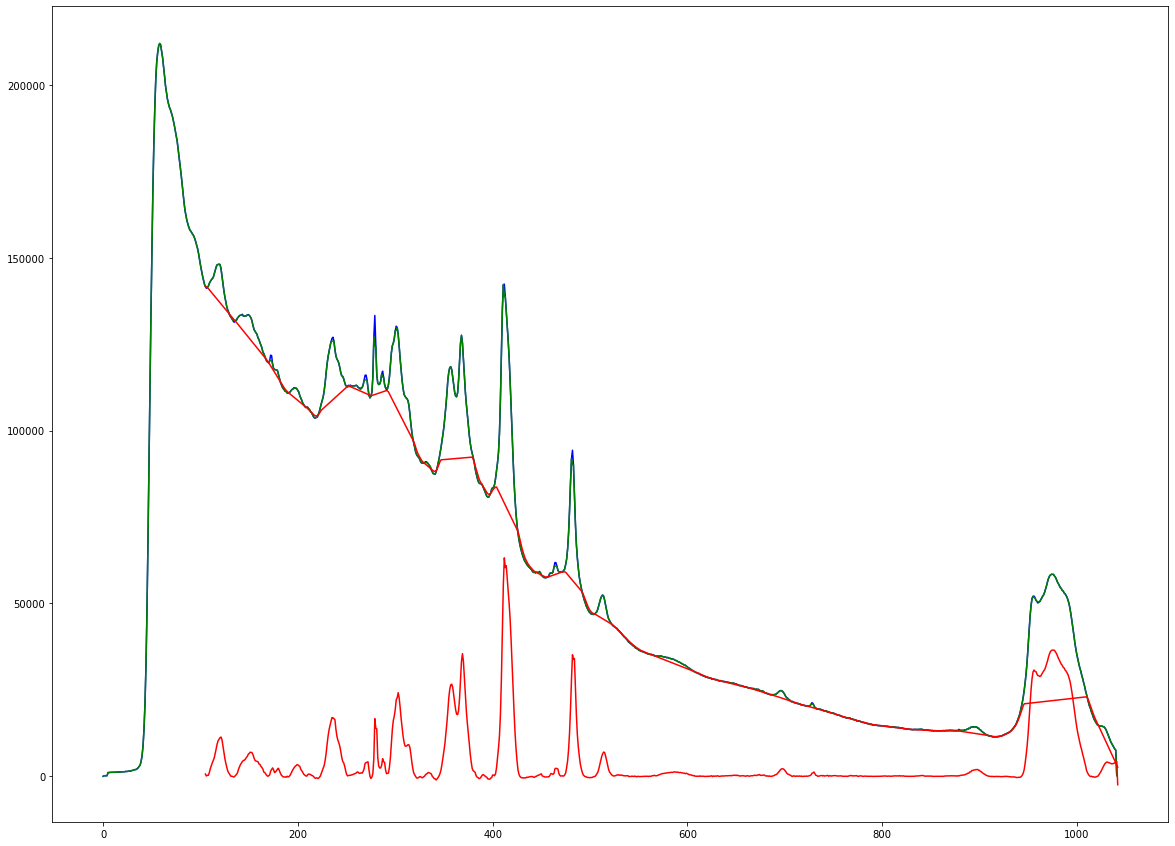

In [69]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(y, color='blue')
plt.plot(Y, color='green')
plt.plot(num[start: end], Y_Modpoly_output, color='red')
#plt.plot(num[start: end], baseline2, color='black')
plt.plot(num[start: end], baseline, color='red')
plt.show()